In [1]:
import pathlib
import datetime
import os

In [2]:
import pandas

In [3]:
import iris

In [4]:
import matplotlib

In [5]:
%matplotlib inline

In [6]:
try:
    root_data_dir = os.environ['OPMET_ROTORS_DATA_ROOT']
except KeyError:
    root_data_dir = '/data/users/shaddad/ds_cop/2021_opmet_challenge/ML'
print(root_data_dir)

/Users/stephen.haddad/data/ml_challenges/Rotors/


## Exploring Falklands Rotor Data

In [7]:
falklands_data_path = root_data_dir

In [8]:
falklands_new_training_data_path = pathlib.Path(falklands_data_path, 'new_training.csv')

In [9]:
falklands_training_df = pandas.read_csv(falklands_new_training_data_path)

In [10]:
falklands_training_df = falklands_training_df.rename({'Rotors 1 is true': 'rotors'},axis=1)

In [11]:
falklands_training_df.loc[falklands_training_df[falklands_training_df['rotors'].isna()].index, 'rotors'] = 0

In [12]:
falklands_training_df

,DTG,air_temp_obs,dewpoint_obs,wind_direction_obs,wind_speed_obs,wind_gust_obs,air_temp_1,air_temp_2,air_temp_3,air_temp_4,...,windspd_18,winddir_19,windspd_19,winddir_20,windspd_20,winddir_21,windspd_21,winddir_22,windspd_22,rotors
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,01/01/2015 00:00,283.9,280.7,110.0,4.1,-9999999.0,284.000,283.625,283.250,282.625,...,5.8,341.0,6.0,334.0,6.1,330.0,6.0,329.0,5.8,0.0
2,01/01/2015 03:00,280.7,279.7,90.0,7.7,-9999999.0,281.500,281.250,280.750,280.250,...,6.8,344.0,5.3,348.0,3.8,360.0,3.2,12.0,3.5,0.0
3,01/01/2015 06:00,279.8,278.1,100.0,7.7,-9999999.0,279.875,279.625,279.125,278.625,...,6.0,345.0,5.5,358.0,5.0,10.0,4.2,38.0,4.0,0.0
4,01/01/2015 09:00,279.9,277.0,120.0,7.2,-9999999.0,279.625,279.250,278.875,278.250,...,3.1,338.0,3.5,354.0,3.9,9.0,4.4,22.0,4.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20101,31/12/2020 06:00,276.7,275.5,270.0,3.6,-9999999.0,277.875,277.750,277.625,277.500,...,12.1,223.0,11.8,221.0,11.4,219.0,11.3,215.0,11.4,0.0
20102,31/12/2020 09:00,277.9,276.9,270.0,3.1,-9999999.0,277.875,277.625,277.875,277.875,...,10.2,230.0,10.8,230.0,11.6,227.0,12.3,222.0,12.0,0.0
20103,31/12/2020 12:00,283.5,277.1,220.0,3.6,-9999999.0,281.125,280.625,280.125,279.625,...,10.3,218.0,11.9,221.0,12.8,222.0,11.9,225.0,10.6,0.0
20104,31/12/2020 15:00,286.1,276.9,250.0,3.6,-9999999.0,284.625,284.125,283.625,283.000,...,9.4,218.0,8.6,212.0,8.3,218.0,8.7,226.0,10.1,0.0


In [13]:
falklands_training_df['rotors'].value_counts()

0.0    19595
1.0      511
Name: rotors, dtype: int64

In [14]:
falklands_training_df.columns

Index(['DTG', 'air_temp_obs', 'dewpoint_obs', 'wind_direction_obs',
       'wind_speed_obs', 'wind_gust_obs', 'air_temp_1', 'air_temp_2',
       'air_temp_3', 'air_temp_4', 'air_temp_5', 'air_temp_6', 'air_temp_7',
       'air_temp_8', 'air_temp_9', 'air_temp_10', 'air_temp_11', 'air_temp_12',
       'air_temp_13', 'air_temp_14', 'air_temp_15', 'air_temp_16',
       'air_temp_17', 'air_temp_18', 'air_temp_19', 'air_temp_20',
       'air_temp_21', 'air_temp_22', 'sh_1', 'sh_2', 'sh_3', 'sh_4', 'sh_5',
       'sh_6', 'sh_7', 'sh_8', 'sh_9', 'sh_10', 'sh_11', 'sh_12', 'sh_13',
       'sh_14', 'sh_15', 'sh_16', 'sh_17', 'sh_18', 'sh_19', 'sh_20', 'sh_21',
       'sh_22', 'winddir_1', 'windspd_1', 'winddir_2', 'windspd_2',
       'winddir_3', 'windspd_3', 'winddir_4', 'windspd_4', 'winddir_5',
       'windspd_5', 'winddir_6', 'windspd_6', 'winddir_7', 'windspd_7',
       'winddir_8', 'windspd_8', 'winddir_9', 'windspd_9', 'winddir_10',
       'windspd_10', 'winddir_11', 'windspd_11', 'windd

In [15]:
falklands_training_df = falklands_training_df[falklands_training_df['wind_speed_obs'] >= 0]

In [47]:
no_rotors_df = falklands_training_df[falklands_training_df['rotors'] == 0]
rotors_present_df = falklands_training_df[falklands_training_df['rotors'] == 1]

Text(0.5, 0, 'wind direction')

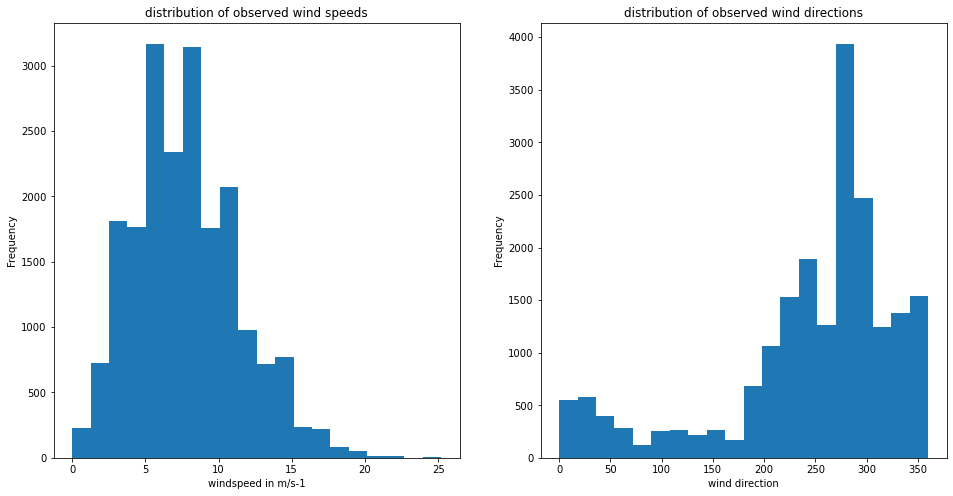

In [16]:
fig1 = matplotlib.pyplot.figure('distribution_wind_spevalue_countsirection', figsize=(16,8))
ax1 = fig1.add_subplot(1,2,1,title='distribution of observed wind speeds')
falklands_training_df['wind_speed_obs'].plot.hist(ax=ax1,bins=20)
ax1.set_xlabel('windspeed in m/s-1',)
ax1 = fig1.add_subplot(1,2,2,title='distribution of observed wind directions')
falklands_training_df['wind_direction_obs'].plot.hist(ax=ax1,bins=20)
ax1.set_xlabel('wind direction',)

In [17]:
falklands_training_df['DTG'] = pandas.to_datetime(falklands_training_df['DTG'])

/var/folders/w0/2x361bn95wj7lfgl33vksx1w0000gn/T/ipykernel_7425/4093216287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falklands_training_df['DTG'] = pandas.to_datetime(falklands_training_df['DTG'])


['air_temp_obs', 'dewpoint_obs', 'wind_direction_obs', 'wind_speed_obs', 'wind_gust_obs']


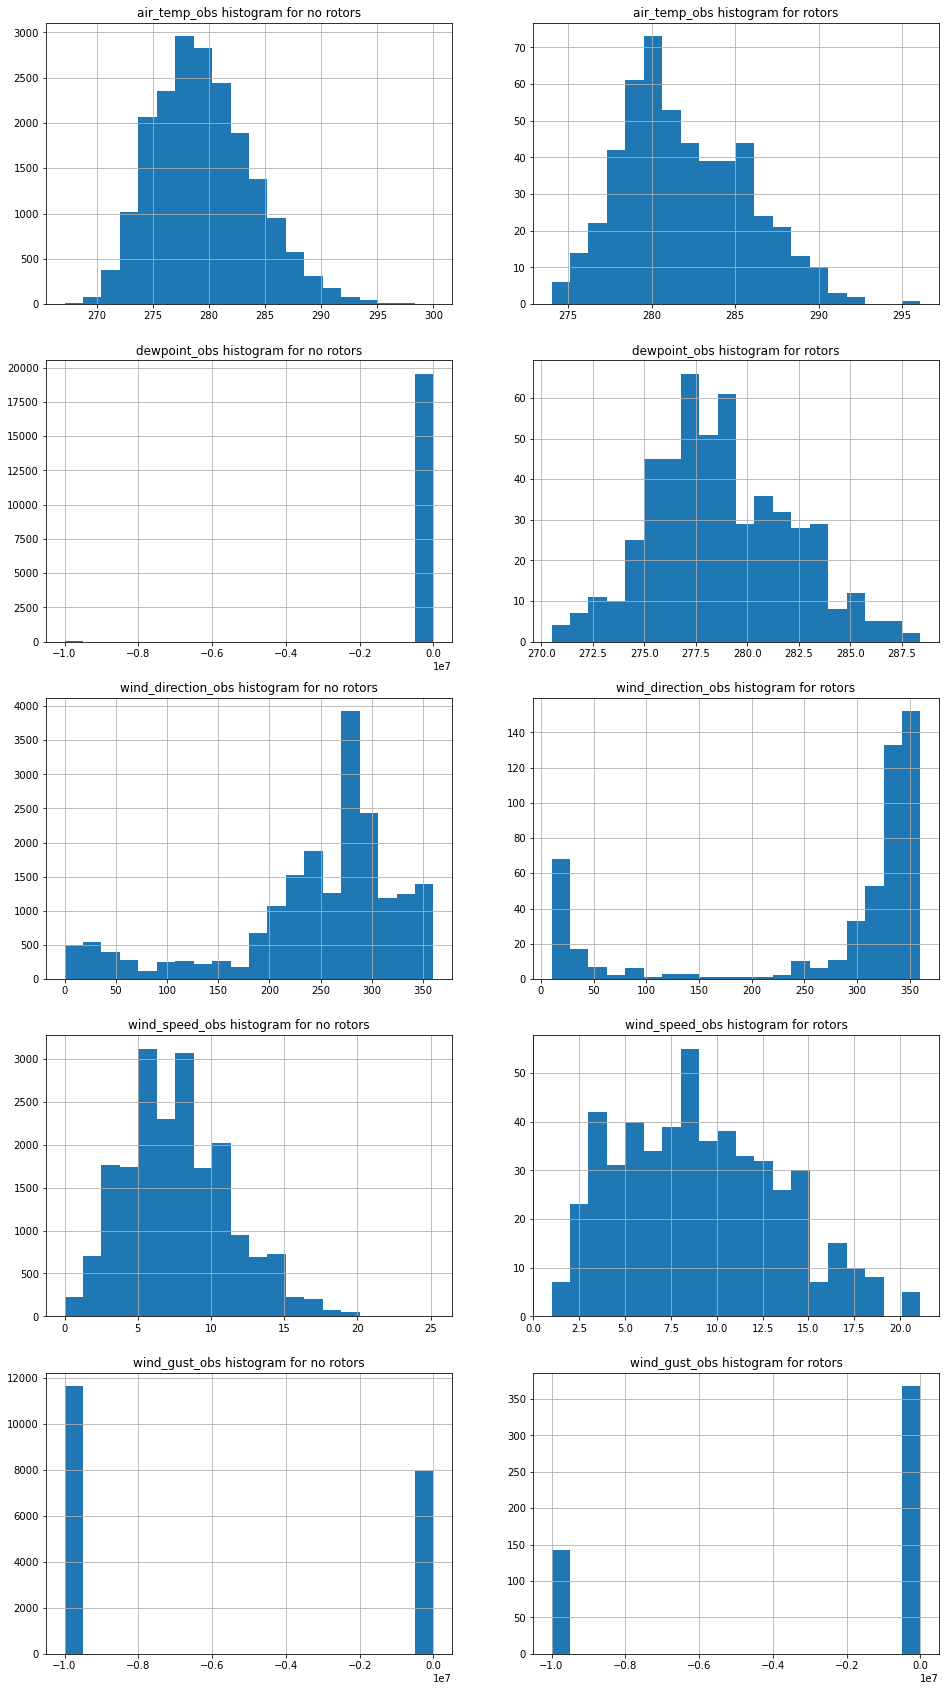

In [44]:
vars_to_plot = ['air_temp_obs', 'dewpoint_obs', 'wind_direction_obs', 'wind_speed_obs', 'wind_gust_obs',]
print(vars_to_plot)
fig1 = matplotlib.pyplot.figure('comparing rota events',figsize=(16,6*len(vars_to_plot)))
for ix1, var_name in enumerate(vars_to_plot):
    ax1 = fig1.add_subplot(len(vars_to_plot),2,ix1*2+1, title=f'{var_name} histogram for no rotors')
    falklands_training_df[falklands_training_df['rotors'] == 0][var_name].hist(bins=20,ax=ax1)
    ax1 = fig1.add_subplot(len(vars_to_plot),2,ix1*2+2, title=f'{var_name} histogram for rotors')
    falklands_training_df[falklands_training_df['rotors'] == 1][var_name].hist(bins=20,ax=ax1)


In [18]:
windspeed_columns = [f'windspd_{ix1}' for ix1 in range(1,21) ]
humidity_columns = [f'sh_{ix1}' for ix1 in range(1,21) ]
wind_dir_columns = [f'winddir_{ix1}' for ix1 in range(1,21) ]
temperature_columns = [f'air_temp_{ix1}' for ix1 in range(1,21) ]


<AxesSubplot:xlabel='DTG,rotors'>

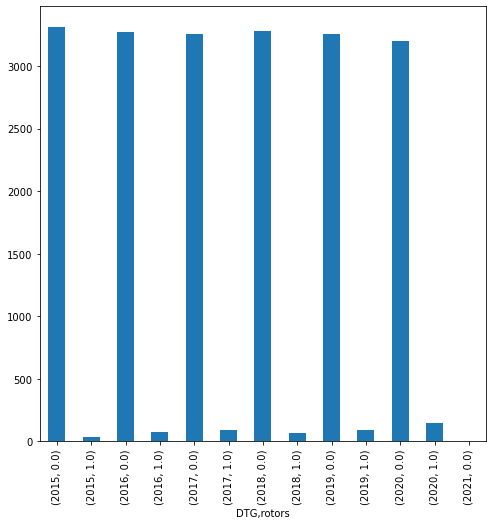

In [70]:
falklands_training_df.groupby([ falklands_training_df['DTG'].apply(lambda x: x.year), falklands_training_df['rotors']])['DTG'].count().plot.bar(figsize=(8,8))

<AxesSubplot:xlabel='DTG'>

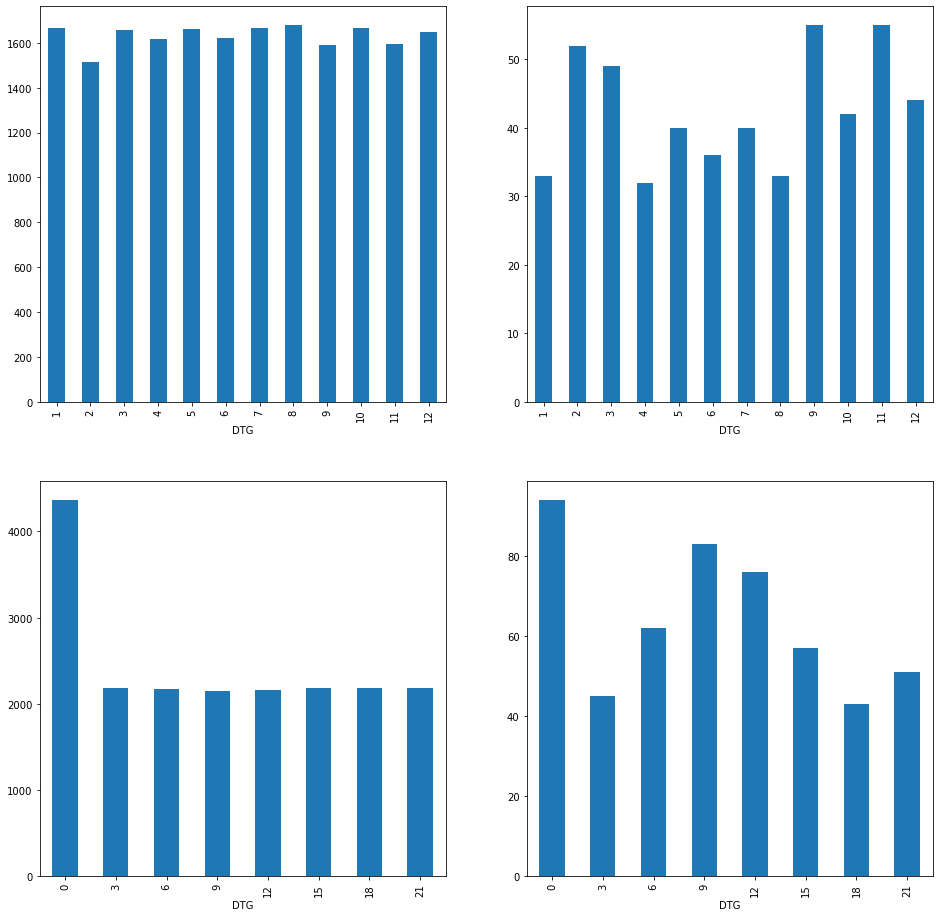

In [80]:
fig1 = matplotlib.pyplot.figure('time of year',figsize=(16,16))
ax1 = fig1.add_subplot(2,2,1) 
no_rotors_df.groupby([ no_rotors_df['DTG'].apply(lambda x: x.month)])['DTG'].count().plot.bar( ax=ax1)
ax1 = fig1.add_subplot(2,2,2) 
rotors_present_df.groupby([ rotors_present_df['DTG'].apply(lambda x: x.month)])['DTG'].count().plot.bar(ax=ax1)

ax1 = fig1.add_subplot(2,2,3) 
no_rotors_df.groupby([ no_rotors_df['DTG'].apply(lambda x: x.hour)])['DTG'].count().plot.bar( ax=ax1)
ax1 = fig1.add_subplot(2,2,4) 
rotors_present_df.groupby([ rotors_present_df['DTG'].apply(lambda x: x.hour)])['DTG'].count().plot.bar(ax=ax1)

## Exploring OpMet results

We have a spreadsheet which logs when OpMets forecast a rotor event compared with one happened. We will explore what this data looks like here so that we can use it compare the performance of the ML models we train with human forecaster performance.

In [87]:
opmet_results_path = falklands_data_path + 'rotors_opmet_performance_2016_2021.csv'
opmet_results_path

'/Users/stephen.haddad/data/ml_challenges/Rotors/rotors_opmet_performance_2016_2021.csv'

In [88]:
opmet_results_df = pandas.read_csv(opmet_results_path)
opmet_results_df

,DTG,observation,opmet_forecast,Hit,False Positive,True Negative,Miss
0,19/09/2016 00:00,NaN,NaN,False,False,True,False
1,19/09/2016 01:00,NaN,NaN,False,False,True,False
2,19/09/2016 02:00,NaN,NaN,False,False,True,False
3,19/09/2016 03:00,NaN,NaN,False,False,True,False
4,19/09/2016 04:00,NaN,NaN,False,False,True,False
...,...,...,...,...,...,...,...
38971,28/02/2021 19:00,NaN,1.0,False,True,False,False
38972,28/02/2021 20:00,NaN,1.0,False,True,False,False
38973,28/02/2021 21:00,NaN,NaN,False,False,True,False
38974,28/02/2021 22:00,NaN,NaN,False,False,True,False


In [93]:
opmet_results_df.loc[opmet_results_df[opmet_results_df.observation.isna()].index,'observation'] = 0.0

In [94]:
opmet_results_df.loc[opmet_results_df[opmet_results_df['opmet_forecast'].isna()].index,'opmet_forecast'] = 0.0

In [104]:
opmet_results_df['DTG'] = pandas.to_datetime(opmet_results_df['DTG'])

In [105]:
opmet_results_df

,DTG,observation,opmet_forecast,Hit,False Positive,True Negative,Miss
0,2016-09-19 00:00:00,0.0,0.0,False,False,True,False
1,2016-09-19 01:00:00,0.0,0.0,False,False,True,False
2,2016-09-19 02:00:00,0.0,0.0,False,False,True,False
3,2016-09-19 03:00:00,0.0,0.0,False,False,True,False
4,2016-09-19 04:00:00,0.0,0.0,False,False,True,False
...,...,...,...,...,...,...,...
38971,2021-02-28 19:00:00,0.0,1.0,False,True,False,False
38972,2021-02-28 20:00:00,0.0,1.0,False,True,False,False
38973,2021-02-28 21:00:00,0.0,0.0,False,False,True,False
38974,2021-02-28 22:00:00,0.0,0.0,False,False,True,False


<AxesSubplot:>

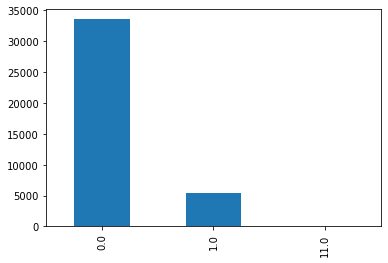

In [106]:
opmet_results_df['opmet_forecast'].value_counts().plot.bar()

In [107]:
falklands_training_df.merge(opmet_results_df,on='DTG')

,DTG,air_temp_obs,dewpoint_obs,wind_direction_obs,wind_speed_obs,wind_gust_obs,air_temp_1,air_temp_2,air_temp_3,air_temp_4,...,windspd_21,winddir_22,windspd_22,rotors,observation,opmet_forecast,Hit,False Positive,True Negative,Miss
0,2016-09-19 00:00:00,277.7,273.2,300.0,10.8,17.0,276.875,276.750,276.625,276.250,...,14.0,270.0,14.3,0.0,0.0,0.0,False,False,True,False
1,2016-09-19 00:00:00,277.7,273.2,300.0,10.8,17.0,276.875,276.750,276.625,276.250,...,14.0,270.0,14.3,0.0,0.0,0.0,False,False,True,False
2,2016-09-19 00:00:00,277.7,273.2,300.0,10.8,17.0,276.875,276.750,276.625,276.250,...,14.0,270.0,14.3,0.0,0.0,0.0,False,False,True,False
3,2016-09-19 03:00:00,277.5,275.0,300.0,10.3,13.9,277.000,276.875,276.625,276.250,...,15.6,271.0,16.3,0.0,0.0,0.0,False,False,True,False
4,2016-09-19 06:00:00,277.5,275.5,320.0,6.2,13.4,276.750,276.625,276.375,276.125,...,14.3,257.0,15.0,0.0,0.0,0.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14350,2020-12-31 06:00:00,276.7,275.5,270.0,3.6,-9999999.0,277.875,277.750,277.625,277.500,...,11.3,215.0,11.4,0.0,0.0,0.0,False,False,True,False
14351,2020-12-31 09:00:00,277.9,276.9,270.0,3.1,-9999999.0,277.875,277.625,277.875,277.875,...,12.3,222.0,12.0,0.0,0.0,0.0,False,False,True,False
14352,2020-12-31 12:00:00,283.5,277.1,220.0,3.6,-9999999.0,281.125,280.625,280.125,279.625,...,11.9,225.0,10.6,0.0,0.0,0.0,False,False,True,False
14353,2020-12-31 15:00:00,286.1,276.9,250.0,3.6,-9999999.0,284.625,284.125,283.625,283.000,...,8.7,226.0,10.1,0.0,0.0,0.0,False,False,True,False


In [ ]:
# also display recall, precision, F1

In [103]:
opmet_results_df['DTG']

0        19/09/2016 00:00
1        19/09/2016 01:00
2        19/09/2016 02:00
3        19/09/2016 03:00
4        19/09/2016 04:00
               ...       
38971    28/02/2021 19:00
38972    28/02/2021 20:00
38973    28/02/2021 21:00
38974    28/02/2021 22:00
38975    28/02/2021 23:00
Name: DTG, Length: 38976, dtype: object

In [102]:
falklands_training_df['DTG']

1       2015-01-01 00:00:00
2       2015-01-01 03:00:00
3       2015-01-01 06:00:00
4       2015-01-01 09:00:00
5       2015-01-01 12:00:00
                ...        
20101   2020-12-31 06:00:00
20102   2020-12-31 09:00:00
20103   2020-12-31 12:00:00
20104   2020-12-31 15:00:00
20105   2021-01-01 00:00:00
Name: DTG, Length: 20101, dtype: datetime64[ns]